## Image preprocessing with HOG feature extraction

In [1]:
## loading packages

import os
import numpy as np
from skimage.feature import hog
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
## HOG configuration
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)

hu_im_path = 'C:\\Users\\admin\\JupyterNotebook_works\\mtech-programing-labs\\S2\\Computer-vision\\Project\\image-dataset-kaggle\\1'
nohu_im_path = 'C:\\Users\\admin\\JupyterNotebook_works\\mtech-programing-labs\\S2\\Computer-vision\\Project\\image-dataset-kaggle\\0'

In [3]:
hu_im_listing = os.listdir(hu_im_path)
nohu_im_listing = os.listdir(nohu_im_path)

print('No. images having Human: ', len(hu_im_listing), '\nNo. images not having Human: ', len(nohu_im_listing))

No. images having Human:  559 
No. images not having Human:  362


In [4]:
data = []
labels = []

In [5]:
for file in hu_im_listing: 
    img = Image.open(hu_im_path + '\\' + file)
    img = img.resize((64,128))
    gray = img.convert('L') 
    hog_feat = hog(gray, orientations, pixels_per_cell, cells_per_block, block_norm='L2', feature_vector=True)
    data.append(hog_feat)
    labels.append(1)

In [6]:
for file in nohu_im_listing:
    img = Image.open(nohu_im_path + '\\' + file)
    img = img.resize((64,128))
    gray = img.convert('L')
    hog_feat = hog(gray, orientations, pixels_per_cell, cells_per_block, block_norm='L2', feature_vector=True) 
    data.append(hog_feat)
    labels.append(0)

In [7]:
data

[array([0.19806037, 0.02086837, 0.0231736 , ..., 0.34821722, 0.18254719,
        0.20904664]),
 array([0.23897332, 0.0688397 , 0.05103638, ..., 0.01099569, 0.00363168,
        0.0027111 ]),
 array([0.51766513, 0.00819343, 0.01896926, ..., 0.403735  , 0.49461623,
        0.05224915]),
 array([0.0207484 , 0.00662783, 0.01676724, ..., 0.10487254, 0.22484782,
        0.08831308]),
 array([0.08999053, 0.06040155, 0.03230584, ..., 0.        , 0.05349611,
        0.18002339]),
 array([0.13057502, 0.00751826, 0.03430665, ..., 0.11309873, 0.04342888,
        0.12331372]),
 array([0.14548972, 0.04512909, 0.00260624, ..., 0.00092605, 0.        ,
        0.00069024]),
 array([0.13667023, 0.1734332 , 0.14553204, ..., 0.01319078, 0.        ,
        0.00641006]),
 array([0.22028007, 0.14138417, 0.11386829, ..., 0.00331833, 0.01504827,
        0.04681132]),
 array([0.34002981, 0.01988667, 0.        , ..., 0.08166472, 0.15707256,
        0.13534199]),
 array([0.06617517, 0.04584052, 0.03137942, ..., 0

In [7]:
data = np.array(data)

In [8]:
print(data.shape)

(921, 3780)


In [9]:
labels = np.array(labels)

## Modelling classifier

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from datetime import datetime
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import joblib

In [16]:
# preparing models
models = []

models.append(('LR',LogisticRegression(random_state=42, max_iter=1000)))
models.append(('KNNC',KNeighborsClassifier()))
models.append(('LSVC',LinearSVC()))
models.append(('SVClass',SVC()))
models.append(('GNB',GaussianNB()))
models.append(('DTC',DecisionTreeClassifier()))
models.append(('RFC',RandomForestClassifier()))
models.append(('BC',BaggingClassifier()))
models.append(('ABC',AdaBoostClassifier()))
models.append(('GBC',GradientBoostingClassifier()))
models.append(('XGBC',XGBClassifier(eval_metric='mlogloss')))

In [17]:
## using scaling
results = []
names = []
scoring = 'f1'
for name, model in models:  
    pipeline = Pipeline(steps=[['scaler', StandardScaler()],
                               ['model', model]])
    kfold = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=42)
    time_bf = datetime.now()
    cv_result = cross_val_score(pipeline, data, labels, scoring=scoring, cv=kfold)
    time_af = datetime.now()
    time_dif = time_af - time_bf
    results.append(cv_result)
    names.append(name)
    msg = "%s score of %s: %f (%f) || time: %f" %(scoring, name, cv_result.mean(), 
                                                    cv_result.std(), round(time_dif.total_seconds()*1000, 3))
    print(msg)

f1 score of LR: 0.734651 (0.017847) || time: 19562.338000
f1 score of KNNC: 0.775805 (0.009662) || time: 30321.935000


C:\Users\admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

f1 score of LSVC: 0.698803 (0.023740) || time: 67262.279000
f1 score of SVClass: 0.806382 (0.009481) || time: 53066.834000
f1 score of GNB: 0.752729 (0.023414) || time: 2402.643000
f1 score of DTC: 0.664621 (0.022413) || time: 33365.069000
f1 score of RFC: 0.798769 (0.007684) || time: 35525.183000
f1 score of BC: 0.720366 (0.014847) || time: 183349.379000
f1 score of ABC: 0.735265 (0.018038) || time: 234879.544000
f1 score of GBC: 0.780139 (0.017313) || time: 1073257.383000


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

f1 score of XGBC: 0.784309 (0.019905) || time: 101955.904000


In [18]:
import matplotlib.pyplot as plt

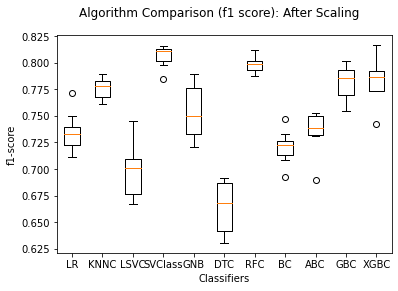

In [19]:
# algorithm comparison by recall score
fig = plt.figure()
fig.suptitle('Algorithm Comparison (f1 score): After Scaling')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xlabel('Classifiers')
plt.ylabel('f1-score')
plt.show()

In [20]:
## using without scaling
results = []
names = []
scoring = 'f1'
for name, model in models:  
    kfold = RepeatedStratifiedKFold(n_splits=3, n_repeats=3)
    time_bf = datetime.now()
    cv_result = cross_val_score(model, data, labels, scoring=scoring, cv=kfold)
    time_af = datetime.now()
    time_dif = time_af - time_bf
    results.append(cv_result)
    names.append(name)
    msg = "%s score of %s: %f (%f) || time: %f" %(scoring, name, cv_result.mean(), 
                                                    cv_result.std(), round(time_dif.total_seconds()*1000, 3))
    print(msg)

f1 score of LR: 0.751235 (0.021137) || time: 21155.556000
f1 score of KNNC: 0.777864 (0.009420) || time: 29120.074000


C:\Users\admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

f1 score of LSVC: 0.724373 (0.027898) || time: 69013.527000
f1 score of SVClass: 0.815478 (0.010743) || time: 51392.300000
f1 score of GNB: 0.749489 (0.017809) || time: 1298.272000
f1 score of DTC: 0.677729 (0.020417) || time: 32798.788000
f1 score of RFC: 0.797712 (0.009791) || time: 34071.252000
f1 score of BC: 0.732068 (0.021577) || time: 191277.132000
f1 score of ABC: 0.754785 (0.021702) || time: 228438.625000
f1 score of GBC: 0.781777 (0.021055) || time: 1118554.538000


C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

f1 score of XGBC: 0.776464 (0.009721) || time: 105304.394000


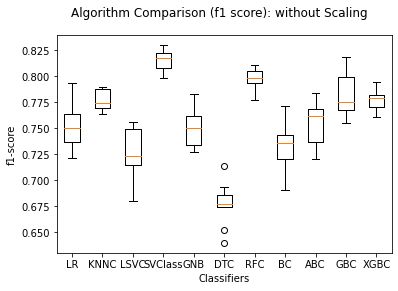

In [21]:
# algorithm comparison by recall score
fig = plt.figure()
fig.suptitle('Algorithm Comparison (f1 score): without Scaling')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xlabel('Classifiers')
plt.ylabel('f1-score')
plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.20, random_state=40, stratify=labels)

In [12]:
print((len(y_train[y_train==0])/y_train.shape[0])*100, 
      (len(y_train[y_train==1])/y_train.shape[0])*100, '\n',
      (len(y_test[y_test==0])/y_test.shape[0])*100,
      (len(y_test[y_test==1])/y_test.shape[0])*100)

39.266304347826086 60.733695652173914 
 39.45945945945946 60.54054054054055


In [13]:
model_svc = SVC()
model_svc.fit(X_train, y_train)
model_svc.score(X_train, y_train)

0.9510869565217391

In [40]:
model_svclin = SVC(kernel='linear')
model_svclin.fit(X_train, y_train)
model_svclin.score(X_train, y_train)

0.9977802441731409

In [14]:
model_lsvc = LinearSVC()
model_lsvc.fit(X_train, y_train)
model_lsvc.score(X_train, y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.998641304347826

In [28]:
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, y_train)
model_rfc.score(X_train, y_train)

0.9988901220865705

In [16]:
time_bf = datetime.now()
y_pred_svc = model_svc.predict(X_test)
time_af = datetime.now()
time_dif = time_af - time_bf
print(round(time_dif.total_seconds()*1000, 3))
print(classification_report(y_test, y_pred_svc))

1265.163
              precision    recall  f1-score   support

           0       0.81      0.52      0.63        73
           1       0.75      0.92      0.82       112

    accuracy                           0.76       185
   macro avg       0.78      0.72      0.73       185
weighted avg       0.77      0.76      0.75       185



In [41]:
time_bf = datetime.now()
y_pred_svclin = model_svclin.predict(X_test)
time_af = datetime.now()
time_dif = time_af - time_bf
print(round(time_dif.total_seconds()*1000, 3))
print(classification_report(y_test, y_pred_svclin))

109.882
              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.92      0.92      0.92        12

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



In [15]:
time_bf = datetime.now()
y_pred_lsvc = model_lsvc.predict(X_test)
time_af = datetime.now()
time_dif = time_af - time_bf
print(round(time_dif.total_seconds()*1000, 3))
print(classification_report(y_test, y_pred_lsvc))

5.989
              precision    recall  f1-score   support

           0       0.57      0.59      0.58        73
           1       0.72      0.71      0.71       112

    accuracy                           0.66       185
   macro avg       0.65      0.65      0.65       185
weighted avg       0.66      0.66      0.66       185



In [30]:
time_bf = datetime.now()
y_pred_rfc = model_rfc.predict(X_test)
time_af = datetime.now()
time_dif = time_af - time_bf
print(round(time_dif.total_seconds()*1000, 3))
print(classification_report(y_test, y_pred_rfc))

25.839
              precision    recall  f1-score   support

           0       0.83      0.62      0.71         8
           1       0.79      0.92      0.85        12

    accuracy                           0.80        20
   macro avg       0.81      0.77      0.78        20
weighted avg       0.80      0.80      0.79        20



In [17]:
confusion_matrix(y_test, y_pred_lsvc)

array([[43, 30],
       [33, 79]], dtype=int64)

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
param_grid = {'tol': [0.0001, 0.001, 0.00001],
              'C': [0.01, 0.1, 1.0, 10, 100],
              'fit_intercept': [True, False],} 

grid = GridSearchCV(LinearSVC(), param_grid, refit=True, verbose=1, scoring='f1', cv=5)              
grid.fit(data, labels)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [52]:
grid.best_params_

{'C': 0.01, 'fit_intercept': True, 'tol': 0.0001}

In [53]:
grid.best_estimator_

LinearSVC(C=0.01)

In [54]:
clf_new = LinearSVC(C=0.01)
clf_new.fit(X_train, y_train)

LinearSVC(C=0.01)

In [55]:
clf_new.score(X_train, y_train)

0.93007769145394

In [58]:
y_pred_new = clf_new.predict(X_test)
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.85      0.92      0.88        12

    accuracy                           0.85        20
   macro avg       0.85      0.83      0.84        20
weighted avg       0.85      0.85      0.85        20



In [59]:
confusion_matrix(y_test, y_pred_new)

array([[ 6,  2],
       [ 1, 11]], dtype=int64)

In [20]:
joblib.dump(model_lsvc, 'svm_model1.npy')

['svm_model1.npy']